# Chapter 8 - Power Transforms

Data transforms are intended to **remove noise and improve the signal in time series forecasting**. It can be very difficult to select a good, or even best, transform for a given prediction problem.

There are many transforms to choose from and each has a diffeerent mathematical intuition.

After completing this tutorial, you will know:
- How to identify `when to` use and `how to` explore a **square root transform**.
- How to identify `when to` use and `explore` a **log transform** and the **expectations on raw data**.
- How to use the **Box-Cox transform** to `perform square root, log, and automatically discover the best power transform` for your dataset.

## 8.1 Airline Passengers Dataset

This dataset describes the total number of airline passengers over time.

In [35]:
# load and plot a time series
from pandas import read_csv
from matplotlib import pyplot
from pylab import rcParams

%matplotlib inline

csvfile = '.\\code\\chapter_08\\airline-passengers.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

pyplot.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

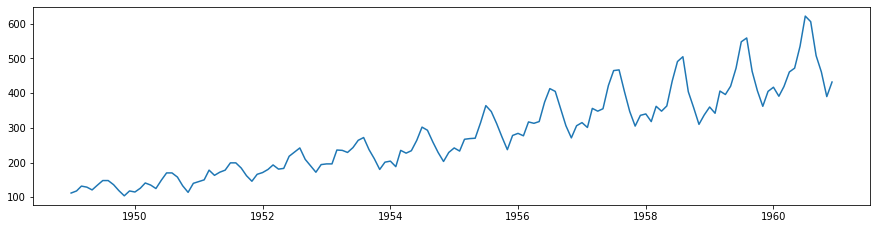

In [36]:
# line plot
rcParams['figure.figsize'] = 15, 8
pyplot.subplot(211)
pyplot.plot(series)

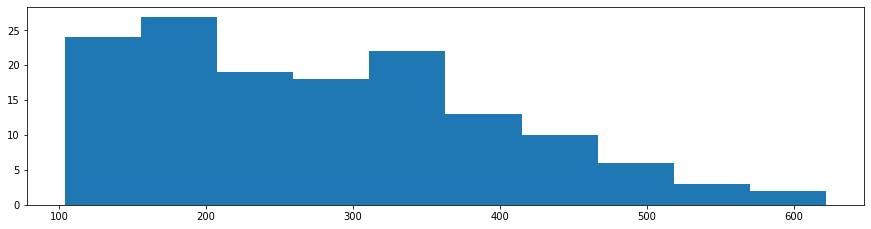

In [37]:
# histogram
rcParams['figure.figsize'] = 15, 8
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

The **dataset is non-stationary**, meaning that `the mean and the variance of the observations change over time`. This makes it difficult to model by both classical statistical methods, like ARIMA, and more sophisticated machine learning methods, like neural networks. This is caused by what appears to be both an increasing trend and a seasonality component.

In addition, the amount of change, or the variance, is increasing with time. This is clear when you look at the size of the seasonal component and notice that from one cycle to the next, the amplitude (from bottom to top of the cycle) is increasing.

## 8.2 Square Root Transform

A time series that has a quadratic growth trend can be made linear by taking the square root.

**Example**: Consider a series of the numbers 1 to 99 squared. The line plot of this series will show a quadratic growth trend and a histogram of the values will show an exponential distribution with a long tail.

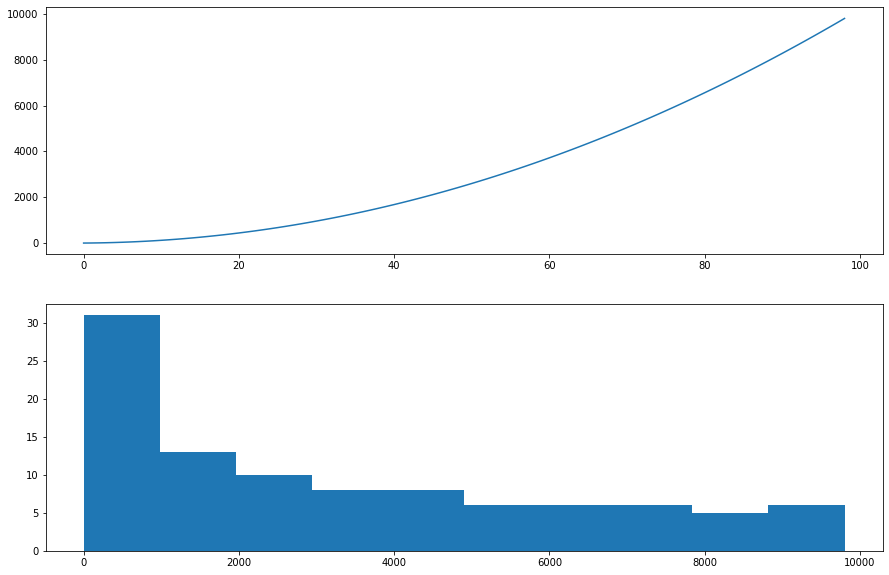

In [31]:
# contrive a quadratic time series
from matplotlib import pyplot
series = [i**2 for i in range(1,100)]
pyplot.figure(1)

# line plot
rcParams['figure.figsize'] = 15, 8
pyplot.subplot(211)
pyplot.plot(series)

# histogram
pyplot.subplot(212)
rcParams['figure.figsize'] = 15, 8
pyplot.hist(series)
pyplot.show()

If you see a structure like this in your own time series, you may have a **quadratic growth trend**. This can be `removed or made linear by taking the inverse operation of the squaring procedure, which is the` **square root**.

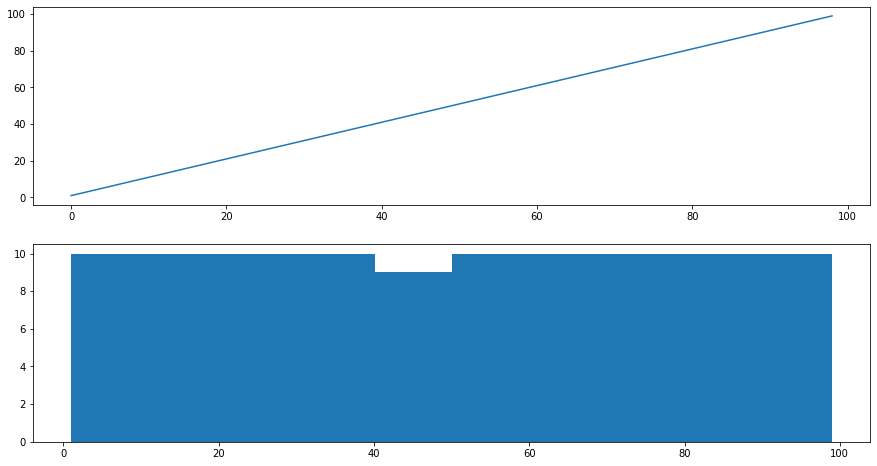

In [33]:
# square root transform a contrived quadratic time series
from matplotlib import pyplot
from numpy import sqrt
series = [i**2 for i in range(1,100)]

# sqrt transform
transform = series = sqrt(series)
pyplot.figure(1)

# line plot
rcParams['figure.figsize'] = 15, 8
pyplot.subplot(211)
pyplot.plot(transform)

# histogram
pyplot.subplot(212)
rcParams['figure.figsize'] = 15, 8
pyplot.hist(transform)
pyplot.show()

If this is the case, then we could expect a square root transform to **reduce the growth trend to be linear and change the distribution of observations to be perhaps nearly Gaussian**.

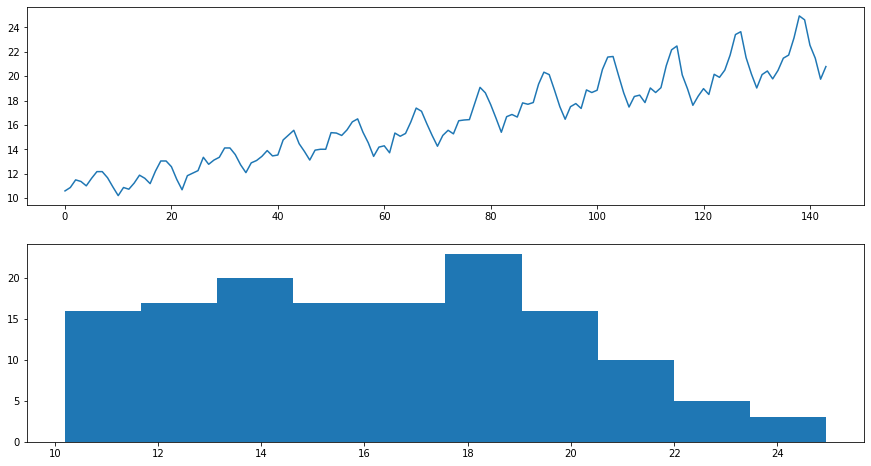

In [38]:
# square root transform a time series
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

csvfile = '.\\code\\chapter_08\\airline-passengers.csv'

series = read_csv(csvfile, header=0, index_col=0, parse_dates=True, squeeze=True)

dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])
pyplot.figure(1)

# line plot
rcParams['figure.figsize'] = 15, 8
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])

# histogram
rcParams['figure.figsize'] = 15, 8
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

In [39]:
series.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [40]:
dataframe.head()

,passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000


We can see that the trend was reduced, but was not removed. The line plot still shows an increasing variance from cycle to cycle. The histogram still shows a long tail to the right of the distribution, suggesting an exponential or long-tail distribution.